In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

from matplotlib import pyplot
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc("font", family = "Malgun Gothic")

In [2]:
df_raw = pd.read_csv("pca추출데이터_군집분석(Hierarchical, K-Means).csv", encoding = "euc-kr")
df_raw.head()

,행정구,공공자전거대여소수,대학생수,버스정류소수,주문인구수,주차장수,지역내총생산,총인구,총전입,코로나19확진자,토지공시지가
0,강남구,145,24333,540,25901,398603,135157,544055,190650,935,7200000
1,강동구,111,17032,388,21499,203140,21123,463998,202874,582,3676000
2,강북구,60,12724,412,14895,11107,10286,311569,83250,445,2294000
3,강서구,162,22970,600,28048,18858,30233,585901,174396,1339,2620000
4,관악구,71,20319,468,23786,153117,11400,509803,196602,1017,3290000


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   행정구        25 non-null     object
 1   공공자전거대여소수  25 non-null     int64 
 2   대학생수       25 non-null     int64 
 3   버스정류소수     25 non-null     int64 
 4   주문인구수      25 non-null     int64 
 5   주차장수       25 non-null     int64 
 6   지역내총생산     25 non-null     int64 
 7   총인구        25 non-null     int64 
 8   총전입        25 non-null     int64 
 9   코로나19확진자   25 non-null     int64 
 10  토지공시지가     25 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.3+ KB


In [4]:
x = df_raw.drop(["행정구"], axis=1) # 독립변인 추출

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_x = scaler.fit_transform(x) # 설명변수

## 계층적 군집분석

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Text(0, 0.5, 'sample index')

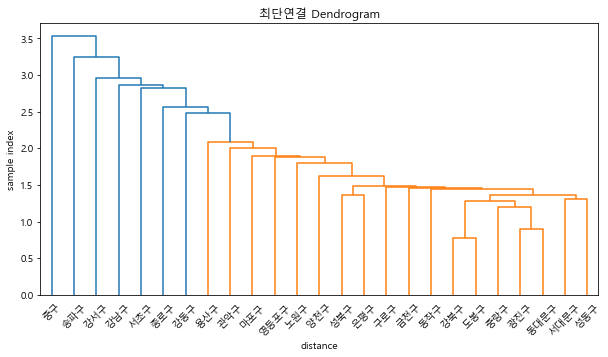

In [7]:
# 연결 : single, 거리: Euclidean
Z_short = linkage(df_x, method = "single", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_short, labels = df_raw["행정구"].values , leaf_font_size = 10)
plt.title("최단연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

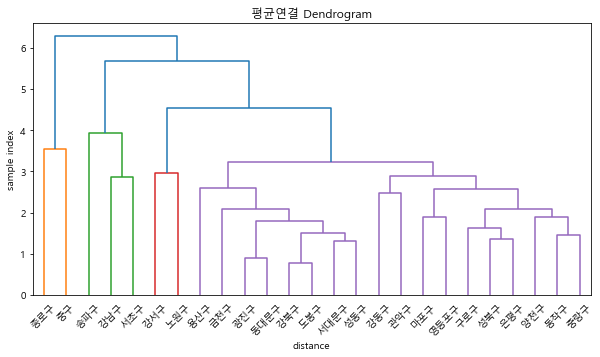

In [8]:
# 연결 : average, 거리: Euclidean
Z_average = linkage(df_x, method = "average", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_average, labels = df_raw["행정구"].values, leaf_font_size = 10)
plt.title("평균연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

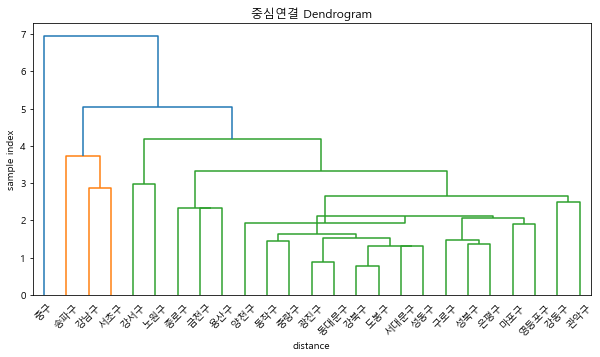

In [9]:
# 연결 : centroid, 거리: Euclidean
Z_centroid = linkage(df_x, method = "centroid", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_centroid, labels = df_raw["행정구"].values, leaf_font_size = 10)
plt.title("중심연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

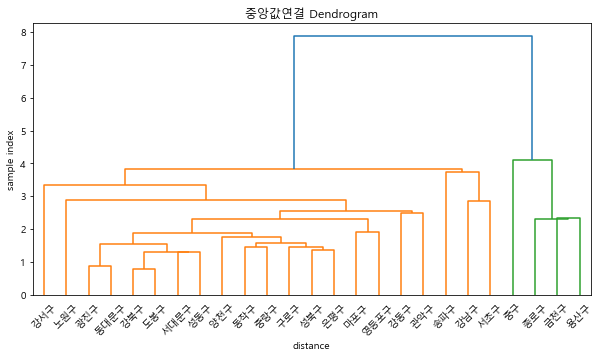

In [10]:
# 연결 : median, 거리: Euclidean
Z_median = linkage(df_x, method = "median", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_median, labels = df_raw["행정구"].values, leaf_font_size = 10)
plt.title("중앙값연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

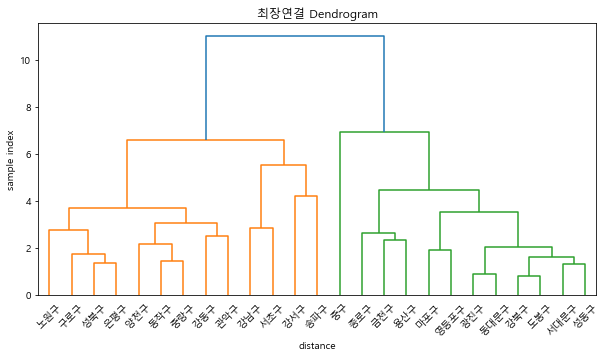

In [11]:
# 연결 : complete, 거리: Euclidean
Z_long = linkage(df_x, method = "complete", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_long, labels = df_raw["행정구"].values, leaf_font_size = 10)
plt.title("최장연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [12]:
long_hierarchical_2 = pd.DataFrame(fcluster(Z = Z_long, t = 8, criterion = "distance"), index = df_raw["행정구"])
long_hierarchical_4 = pd.DataFrame(fcluster(Z = Z_long, t = 6, criterion = "distance"), index = df_raw["행정구"])

In [13]:
long_hierarchical_2[0].values

array([1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 1], dtype=int32)

In [14]:
long_hierarchical_4[0].values

array([2, 1, 3, 2, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 2, 1, 3, 3, 1,
       3, 4, 1], dtype=int32)

Text(0, 0.5, 'sample index')

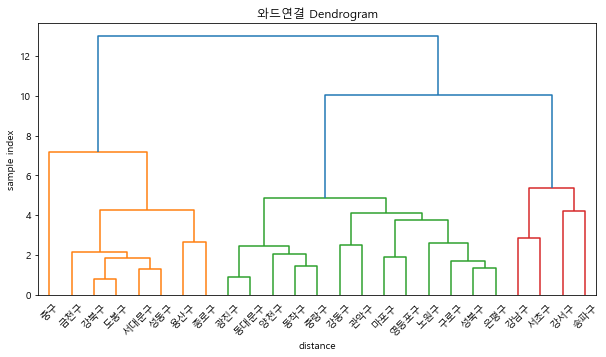

In [15]:
# 연결 : ward, 거리: Euclidean
Z_ward = linkage(df_x, method = "ward", metric = "euclidean")

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

dendrogram(Z_ward, labels = df_raw["행정구"].values, leaf_font_size = 10)
plt.title("와드연결 Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [16]:
ward_hierarchical_3 = pd.DataFrame(fcluster(Z = Z_ward, t = 8, criterion = "distance"), index = df_raw["행정구"])
ward_hierarchical_4 = pd.DataFrame(fcluster(Z = Z_ward, t = 6, criterion = "distance"), index = df_raw["행정구"])

In [17]:
ward_hierarchical_2 = pd.DataFrame(fcluster(Z = Z_ward, t = 11, criterion = "distance"), index = df_raw["행정구"])

In [18]:
ward_hierarchical_3[0].values

array([3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 1, 2, 3, 2, 2, 1, 2,
       1, 1, 2], dtype=int32)

In [19]:
ward_hierarchical_4[0].values

array([4, 3, 1, 4, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 4, 1, 3, 4, 3, 3, 1, 3,
       1, 2, 3], dtype=int32)

In [20]:
ward_hierarchical_2[0].values

array([2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2], dtype=int32)

In [21]:
df = df_raw
df["ClusterHierarchical"] = ward_hierarchical_3.values
df.head()

,행정구,공공자전거대여소수,대학생수,버스정류소수,주문인구수,주차장수,지역내총생산,총인구,총전입,코로나19확진자,토지공시지가,ClusterHierarchical
0,강남구,145,24333,540,25901,398603,135157,544055,190650,935,7200000,3
1,강동구,111,17032,388,21499,203140,21123,463998,202874,582,3676000,2
2,강북구,60,12724,412,14895,11107,10286,311569,83250,445,2294000,1
3,강서구,162,22970,600,28048,18858,30233,585901,174396,1339,2620000,3
4,관악구,71,20319,468,23786,153117,11400,509803,196602,1017,3290000,2


### 군집별 데이터 요약

In [22]:
# 집계함수를 이용한 군집별 데이터 요약
ds_summary_hc = df.groupby("ClusterHierarchical").agg(["min", "mean", "max"])

# 집계함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)

ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,공공자전거대여소수_min,공공자전거대여소수_mean,공공자전거대여소수_max,대학생수_min,대학생수_mean,대학생수_max,버스정류소수_min,버스정류소수_mean,버스정류소수_max,...,총인구_max,총전입_min,총전입_mean,총전입_max,코로나19확진자_min,코로나19확진자_mean,코로나19확진자_max,토지공시지가_min,토지공시지가_mean,토지공시지가_max
0,1,60,77.125,106,4788,10690.750,14523,200,367.500,456,...,327361,41554,76040.250,113008,283,426.625,574,2282000,3529875.000,5610000
1,2,71,94.077,136,12777,18143.385,28474,281,444.154,606,...,527032,109816,140502.308,202874,461,727.462,1017,2405000,3212538.462,4920000
2,3,136,156.750,184,17472,23283.500,28359,429,547.750,622,...,673926,142500,180350.500,213856,826,1054.750,1339,2620000,5160500.000,7200000
